<a href="https://colab.research.google.com/github/tsatir/Thinkful-Data_Science/blob/master/ab_test_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [46]:
data = pd.read_csv("https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/ab_edited.csv")
data.head()

data['date'] = pd.DatetimeIndex(data['timestamp']).date
data.head()

,user_id,timestamp,group,landing_page,converted,date
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,2017-01-21
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,2017-01-12
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,2017-01-11
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,2017-01-08
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,2017-01-21


In [45]:
control_data = data[data['group']=='control']
treatment_data = data[data['group']=='treatment']

print('control data')
control_data.info()

print()
print('treatment data')
treatment_data.info()

control data
<class 'pandas.core.frame.DataFrame'>
Int64Index: 145274 entries, 0 to 290583
Data columns (total 6 columns):
user_id         145274 non-null int64
timestamp       145274 non-null object
group           145274 non-null object
landing_page    145274 non-null object
converted       145274 non-null int64
date            145274 non-null object
dtypes: int64(2), object(4)
memory usage: 7.8+ MB

treatment data
<class 'pandas.core.frame.DataFrame'>
Int64Index: 145311 entries, 2 to 290584
Data columns (total 6 columns):
user_id         145311 non-null int64
timestamp       145311 non-null object
group           145311 non-null object
landing_page    145311 non-null object
converted       145311 non-null int64
date            145311 non-null object
dtypes: int64(2), object(4)
memory usage: 7.8+ MB


In [37]:
#Check for adequate sample sizes.

print("The control sample size is:",len(control_data))
print("The test sample size is:",len(treatment_data))

# What is the signup rate of test and control?

print("The signup rate for treatment data is:",round(treatment_data['converted'].mean(),3))
print("The signup rate for control data is:",round(control_data['converted'].mean(),3))

# Are the test and control groups significantly different?

stats.ttest_ind(treatment_data['converted'],control_data['converted'])

The control sample size is: 145274
The test sample size is: 145311
The signup rate for treatment data is: 0.119
The signup rate for control data is: 0.12


Ttest_indResult(statistic=-1.3116069027036805, pvalue=0.18965383906859376)

Groups are not significantly different, but sample sizes are big.

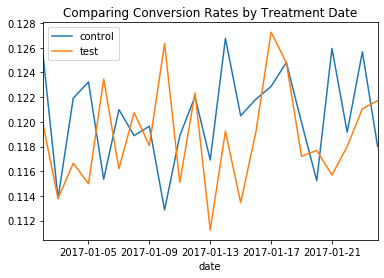

T-Test Results by Date
Ttest_indResult(statistic=1.8123288054674913, pvalue=0.0699579338988825)
Ttest_indResult(statistic=-0.05182821974845549, pvalue=0.9586663564605943)
Ttest_indResult(statistic=0.6795024407954999, pvalue=0.49683133482307695)
Ttest_indResult(statistic=-0.33111903181744556, pvalue=0.7405597598504309)
Ttest_indResult(statistic=-2.3999515991310387, pvalue=0.01641085244784032)
Ttest_indResult(statistic=0.4836129647924235, pvalue=0.628668638020595)
Ttest_indResult(statistic=-0.7611804663738991, pvalue=0.446562930057432)
Ttest_indResult(statistic=0.9315635899845935, pvalue=0.3515792521983202)
Ttest_indResult(statistic=1.261388402374626, pvalue=0.20719113309271808)
Ttest_indResult(statistic=0.0026642818202597274, pvalue=0.9978742538059032)
Ttest_indResult(statistic=0.28071255594768935, pvalue=0.7789352633524722)
Ttest_indResult(statistic=0.2056136446252576, pvalue=0.837095874040602)
Ttest_indResult(statistic=-0.4909032980527966, pvalue=0.6235093367111435)
Ttest_indResult(st

In [39]:
#Check for changes over time in results.

fig = control_data[['date','converted']].groupby('date').mean().plot()
treatment_data[['date','converted']].groupby('date').mean().plot(ax=fig)
plt.legend(['control','test'])
plt.title('Comparing Conversion Rates by Treatment Date')
plt.show()

# Generate a test statistic comparing test and control on treatment date
#Formally test for a significant difference in conversions between treatment and control groups.

print('T-Test Results by Date')

for date in data['date'].unique():
    dated_data = data[data['date'] == date]
    print(stats.ttest_ind(dated_data[dated_data['group'] == 'control'].converted,
                          dated_data[dated_data['group'] == 'treatment'].converted))

There does not appear to be a significant difference in control and treatment groups and this pattern holds up throughout the rollout.